# Ипорты библиотек и технические настройки

In [1]:
import pandas as pd
import numpy as np
import random
from scipy import stats
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import seaborn as sns
import datetime

Датасет `bike_rent` взят из [тренировочных данных для олимпиады ДАНО](https://dano.hse.ru/library/task)

In [3]:
base_path = r'C:\Users\Maria Smirnova\Desktop\1944\Занятия\Задачник\\'
f_bike_rent = r'bike_rent.csv'
bike_rent = pd.read_csv(base_path+f_bike_rent)
bike_rent['timestamp'] = pd.to_datetime(bike_rent['timestamp'], format='%Y-%m-%d %H:%M:%S')
comp_avg=pd.DataFrame()

In [4]:
bike_rent.sample(5)

,timestamp,cnt,t1,t2,hum,wind_speed,is_holiday,weather,year,month,day
162,2015-01-10 19:00:00,720,6.0,2.0,57.0,26.0,0,clear,2015,1,10
12751,2016-06-21 04:00:00,59,16.0,16.0,77.0,15.0,0,few clouds,2016,6,21
11065,2016-04-11 22:00:00,449,11.0,11.0,88.0,13.0,0,few clouds,2016,4,11
654,2015-01-31 07:00:00,129,3.0,-1.0,87.0,16.0,0,snowfall,2015,1,31
7896,2015-11-30 16:00:00,1072,13.5,13.5,79.5,36.0,0,light rain,2015,11,30


# Описательная статистика

## Как характеризовать набор

**Среднее** арифиметическое - соотношение суммы всех чисел множества, к их количеству.  
Например, посмотрим среднее количество аренд велосипедов (показатель `cnt`) из датасета `bike_rent`

In [5]:
print(f'Среднее количество случаев аренды велосипедов в час: {bike_rent.cnt.mean():.2f}')
print(f'Проверим, что действительно получили среднее:')
print(f'Поделим сумму {bike_rent.cnt.sum():.2f} '
      f'на количество данных {bike_rent.cnt.count():.2f} = {bike_rent.cnt.sum()/bike_rent.cnt.count():.2f}')
comp_avg['ArithMean']=bike_rent.cnt.mean()

Среднее количество случаев аренды велосипедов в час: 1143.10
Проверим, что действительно получили среднее:
Поделим сумму 19905972.00 на количество данных 17414.00 = 1143.10


**Среднее** может быть разным. Принцип его расчёта может базироваться на разных подходах. Например, бывает *среднее геометрическое* - это корень n-ой степени из произведения всех значений выборки.   

Расчёт среднего геометрического, обычно требователен к мощностям. В случае выше пришлось бы, перемножить 17 тыс данных, а потом извлечь корень той же степени. 
Поэтому просто посмотрим пример:

In [6]:
numbers = [2, 8]
product = 2*8
divider = len(numbers)
gmean = product**(1/divider)
print(f'Для чисел {", ".join(str(x) for x in numbers)}, среднее геометрическое равно = {gmean:.1f}')
print(f'Заметим, что среднее геометрическое {gmean:.1f} в степени {len(numbers)} = {gmean**len(numbers)}'\
      f' равносильно произведению всех чисел списка: {np.prod(numbers)}')

Для чисел 2, 8, среднее геометрическое равно = 4.0
Заметим, что среднее геометрическое 4.0 в степени 2 = 16.0 равносильно произведению всех чисел списка: 16


**Медиана** - это такое значение, которое находится посередине упорядоченного ряда данных, так что половина наблюдений меньше этого значения, а другая половина больше. 
Посмотрим, для нашего набора данных `bike_rent` и того же показателя, количества фактов аренды в час `cnt`

In [7]:
print(f'Медиана аренды велосипедов в час: {bike_rent.cnt.median():.2f}')
comp_avg['Median']=bike_rent.cnt.median()

Медиана аренды велосипедов в час: 844.00


**Мода** - это наиболее часто встречающаеся значение во всём наборе данных. Наример, если у нас сто "1" и одна "100" в наборе данных, то мода будет "1".  
Из определения понятно, что мод может быть несколько. Если у нас пятьдесят "1" и пятьдесят "100", то оба числа попадут в моду. 

In [8]:
print(f'Сколько мод у данных: {len(bike_rent.cnt.mode())}')
print(f'Мода аренды велосипедов в час: {", ".join(str(x) for x in bike_rent.cnt.mode().values)}')
comp_avg['Mode'] = bike_rent.cnt.mode()

Сколько мод у данных: 1
Мода аренды велосипедов в час: 46


**Средневзвешанное**, точнее средневзвешанное арифметическое - это сумма произведений каждого элемента на его вес, деленная на сумму всех весов.  
То есть для каждого значения есть некоторый вес w_i. Веса могут иметь разное значение, иногда они отражают частотную характеристику или же значимость каких-то конкртеных показателей. 

Например, если бы система аренда велосипеда поднимала цену в **два раза** (такое вот упрощённое динамическое ценообразование) при условии фактов аренды  больше 1000 (`cnt`>1000) в выходные `is_holiday` = 1, то средневзвешанное могло бы быть

In [9]:
bike_rent['weight'] = 1
bike_rent.loc[(bike_rent.cnt>1000) & (bike_rent.is_holiday==1), 'weight'] = 2
print(f'Всего часов, когда оба требования к повышению веса выполняются: {bike_rent.weight.value_counts()[2]}. '\
      f'Это всего {bike_rent.weight.value_counts()[2]/len(bike_rent)*100:.2f}% случаев.')
print(f'Средневзвешанное равно: {(bike_rent.cnt*bike_rent.weight).mean():.2f}')
comp_avg['WeigMean'] = (bike_rent.cnt*bike_rent.weight).mean()

Всего часов, когда оба требования к повышению веса выполняются: 107. Это всего 0.61% случаев.
Средневзвешанное равно: 1154.59


**Гармоническое среднее** - обратная величина от среднего знчения обртных велечин. То есть количество разделить на обратные значения каждого показателя (1/x).  
Примерно так:

In [10]:
non_zero = bike_rent.cnt[bike_rent.cnt!=0].values
n = len(non_zero)
hmean = n/sum(1/x for x in non_zero)
print(f'Среднее гармоническое для аренды велосипедов: {hmean:.2f}')
comp_avg['HarMean'] = hmean

Среднее гармоническое для аренды велосипедов: 245.04


Банальные: **максимум** и **минимум** - очень помогут найти нам пределы значений и, очень важно, оценить адекватность представленных данных. Разность между максимальным и минимальным значением называют **размах**.

In [11]:
print(f'Максимальное количество аренд за час: {bike_rent.cnt.max()}, '\
      f'минимальное: {bike_rent.cnt.min()} ')
print(f'Размах данных: {bike_rent.cnt.max()-bike_rent.cnt.min()}')
comp_avg['Max']=bike_rent.cnt.max()
comp_avg['Min']=bike_rent.cnt.min()

Максимальное количество аренд за час: 7860, минимальное: 0 
Размах данных: 7860


**Квантиль** выборки - это число, которое делит выборку на две части таким образом, что определённый процент элементов выборки имеют значения не больше данного числа. Например, если 90-й процентиль выборки равен 5, это значит, что 90% элементов выборки имеют значения не больше 5.   

Это понятие пришло из статистики, где его трактуют так следующим образом - это значение, которое заданная случайная величина не превышает с фиксированной вероятностью.  

Часто используют значение **квартиль** - то есть деление выборки на 4 равные части (то есть в первом квартиле `Q1` находится ровно 25% значений, во втором `Q2` ещё 25%: от 25% до 50% и так далее.)

In [12]:
# в пандас есть метод pandas.Series.quantiel(q=0.5, interpolation='linear')
# где q - это искомый квантиль (квантили)
quartile = bike_rent.cnt.quantile([0.25, 0.5, 0.75])
print(f'Первый квартиль Q1, заканчивается на значенеии: {quartile[0.25]}')
print(f'Второй квартиль Q2, заканчивается на значенеии: {quartile[0.5]}')
print(f'Третий квартиль Q3, заканчивается на значенеии: {quartile[0.75]}')

print(f'Давайте проверим, что между в Q1, столько же данных, сколько в Q2, Q3, Q4:')
print(f'Значений в отрезке Q1: {len(bike_rent.query("cnt <= @quartile[0.25]"))}')
print(f'Значений в отрезке Q2: {len(bike_rent.query("cnt > @quartile[0.25] and cnt <= @quartile[0.5]"))}')
print(f'Значений в отрезке Q3: {len(bike_rent.query("cnt > @quartile[0.5] and cnt <= @quartile[0.75]"))}')
print(f'Значений в отрезке Q4: {len(bike_rent.query("cnt > @quartile[0.75]"))}')
comp_avg['Q1']=quartile[0.25]
comp_avg['Q2']=quartile[0.5]
comp_avg['Q3']=quartile[0.75]

Первый квартиль Q1, заканчивается на значенеии: 257.0
Второй квартиль Q2, заканчивается на значенеии: 844.0
Третий квартиль Q3, заканчивается на значенеии: 1671.75
Давайте проверим, что между в Q1, столько же данных, сколько в Q2, Q3, Q4:
Значений в отрезке Q1: 4357
Значений в отрезке Q2: 4355
Значений в отрезке Q3: 4348
Значений в отрезке Q4: 4354


Ой! Но ведь количество данных, хоть не сильно, но отличается!  
Верно, когда мы считали количество данных, то использовали неравенства, однако как следует из определения квантили - это о количестве точек, поэтому если существуют одинаковые значения, то часть из них может попасть в один квантиль, а другая уже в следующий.  
Мы также видим, что можем настраивать возвращаемую границу методом `quantile` - `interpolation` может принимать разные значения, посмотрите в [документации](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.quantile.html) и попробуйте исследовать изменения результата самостоятельно.

Давайте, попробуем посмотреть другим образом:

In [13]:
print(f'Всего данных в датасете: {len(bike_rent)}')
print(f'если разделить его на четыре равные части, то в каждой части должно быть:'\
      f'{len(bike_rent)/4}')
print(f'Первые {round(len(bike_rent)/4)} значений отсортированного набора '\
      f'заканчиваются на: {bike_rent.sort_values(by="cnt").iloc[round(len(bike_rent)/4)]["cnt"]}')
print(f'Следующие {round(len(bike_rent)/4)} значений отсортированного набора '\
      f'заканчиваются на: {bike_rent.sort_values(by="cnt").iloc[2*round(len(bike_rent)/4)]["cnt"]}')
print(f'Третий квартиль {round(len(bike_rent)/4)} значений отсортированного набора '\
      f'заканчиваются на: {bike_rent.sort_values(by="cnt").iloc[3*round(len(bike_rent)/4)]["cnt"]}')

Всего данных в датасете: 17414
если разделить его на четыре равные части, то в каждой части должно быть:4353.5
Первые 4354 значений отсортированного набора заканчиваются на: 257
Следующие 4354 значений отсортированного набора заканчиваются на: 844
Третий квартиль 4354 значений отсортированного набора заканчиваются на: 1673


Отлично, то есть все границы квартелей правильные!  
Понять почему `1673`, а не `1671.74` прочитав документацию, ссылку на которую есть выше.

**Подитог** - выше были рассмотрены *среднее арифметическое*, *медиана*, *мода*, *средневзвешанное*, *среднее гармоническое*, *максимум*, *минимум* и границы *квартилей*.  

Для удобства все эти показатели были собраны в датафрейм `comp_avg`. Чтобы добавить ещё больше наглядности по соотношению всех этих характеристик, давайте выведем их вместе с гистораммой данных

,ArithMean,Median,Mode,WeigMean,HarMean,Max,Min,Q1,Q2,Q3
0,NaN,NaN,46,1154.585448,245.038291,7860,0,257.0,844.0,1671.75


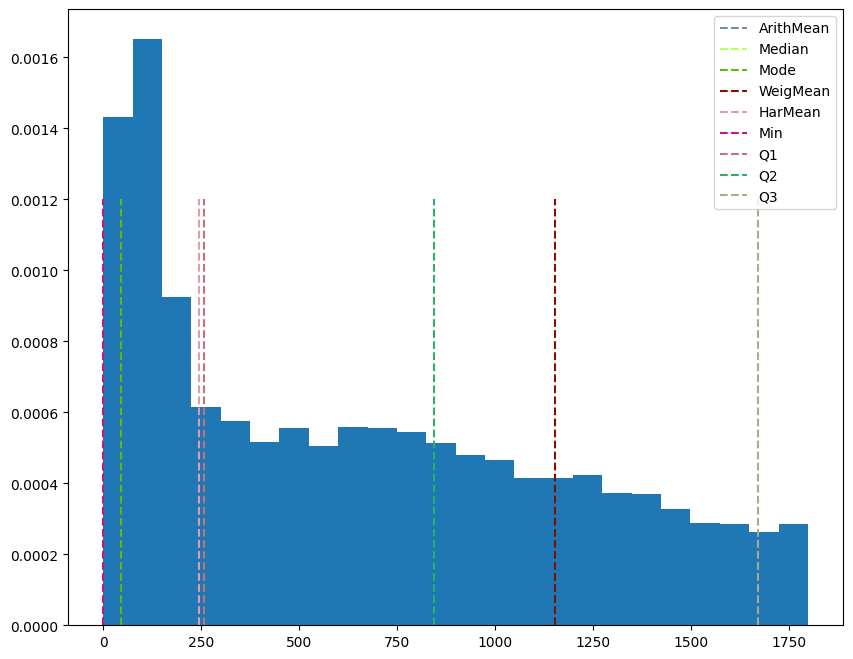

In [14]:
display(comp_avg)
colors_list = list(colors._colors_full_map.values())

plt.figure(figsize=(10, 8))
plt.hist(bike_rent.query('cnt < 1800')['cnt'], bins='auto', density=True)
for clm in comp_avg:
    if clm == 'Max':
        continue
    plt.vlines(comp_avg[clm], ymin=0, ymax=0.0012, linestyles='dashed', colors=random.choice(colors_list), label=clm)
plt.legend()
plt.show()

## Пробуем самостоятельно

In [2]:
#не подглядывай сюда - сверни блок, иноче не так интересно будет. Выполнить можно и свёрнутый
sample_size = 150
dataset_1 = np.random.normal(loc=0, scale=1, size=sample_size)
dataset_2 = np.random.exponential(scale=1, size=sample_size)
dataset_3 = np.random.beta(a=0.3, b=5, size=sample_size)
dataset_4 = np.random.binomial(n=5, p=0.3, size=sample_size)
dataset_5 = np.random.gamma(shape=3, scale=3, size=sample_size)
dataset_6 = np.random.geometric(p=0.5, size=sample_size)
dataset_7 = np.random.logistic(loc=0, scale=3, size=sample_size)
dataset_8 = np.random.lognormal(mean=1, sigma=2, size=sample_size)
dataset_9 = np.random.pareto(a=5, size=sample_size)
datasets = [dataset_1, dataset_2, dataset_3, dataset_4, dataset_5, 
            dataset_6, dataset_7, dataset_8, dataset_9]



Для желающих работать в других программах аналитики выгрузим `csv-файл`

In [8]:
types=['normal', 'exponential', 'beta', 'binominal', 
       'gamma', 'geometric', 'logistic', 'lognormal', 'pareto']
dist_dict = dict(zip(types, datasets))
final_df = pd.DataFrame(columns=['value', 'type'])
for d in dist_dict.keys():
    df = pd.DataFrame(dist_dict[d], columns=['value'])
    df['type'] = d
    final_df = pd.concat([final_df, df])
final_df.to_csv('testing distributions.csv')

C:\Users\Maria Smirnova\AppData\Local\Temp\ipykernel_6048\3505428644.py:8: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  final_df = pd.concat([final_df, df])


В списке `datasets` находятся 9 элементов списков, в которых нахоится по 150 чисел.   
Нужно:
1) найти для каждого набора  *среднее арифметическое*, *моду*, *среднее гармоническое*, *максимум*, *минимум* и границы *квартилей*. А также вывести гистограмму и каждое из вычелсенных значений.   
2) описать словестно, чем эти наборыт отличаются друг от друга? Какая характерная черта есть у каждого?

NB! обращаю внимание, что в примере мы работали с типом `pandas.Series`, здесь же `list`.

# Визуализация данных

Сейчас мы будем рассматривать более-менее стандартные подходы к визуализации данных. При этом использовать наиболее часто встречающиеся графики и библиотеки.  

Вeрнемся к датасету про аренду велосипедов `bike_rent`:

In [16]:
display(bike_rent.sample(5))

,timestamp,cnt,t1,t2,hum,wind_speed,is_holiday,weather,year,month,day,weight
8463,2015-12-24 12:00:00,385,11.5,11.5,77.0,36.0,0,light rain,2015,12,24,1
1556,2015-03-09 22:00:00,382,11.0,11.0,88.0,17.0,0,light rain,2015,3,9,1
5327,2015-08-14 14:00:00,1438,21.0,21.0,71.0,19.5,0,broken clouds,2015,8,14,1
16290,2016-11-18 04:00:00,40,5.5,1.5,78.5,23.0,0,clear,2016,11,18,1
15177,2016-10-02 17:00:00,2362,16.5,16.5,50.5,16.0,0,few clouds,2016,10,2,1


Столбцы такие:  
`timestamp` - отметка даты и часа. В таблице данные группированы по часам, то есть мы видим количество аренд в конкретный час.  
`cnt` - число арендованных велосипедов в этот час;  
`t1` - фактическая температура;  
`t2` - темпераутра "как ощущается";    
`hum` - влажность;  
`wind_speed` - скорость ветра км/ч;    
`weahter` -  тип погоды;  
`is_holiday` - праздничник или нет(1/0).  

**Гистограмма** - это графический метод представления данных, который используется для визуализации распределения значений случайной величины.

Она представляет собой столбчатую диаграмму, где каждый столбец отражает частоту появления определенного значения или группы значений в выборке. Высота столбца пропорциональна количеству элементов выборки, которые попадают в соответствующий интервал. Гистограмма позволяет быстро увидеть общую картину распределения данных и обнаружить аномалии или тенденции. Она особенно полезна для анализа данных, которые представляют собой непрерывные переменные, такие как возраст, доход, температура и т.д.  

Посмотрим на примере `weather` из `bike_rent` и увидим, что велосипеды арендуют охотно в хорошую погоду, нежели чем в плохую. Однако, сразу заметим, что легкий дождик не помеха взять велосипед.

NB! заметьте, гистограмма просто считает сколько раз встречается та или иная погода

<Axes: >

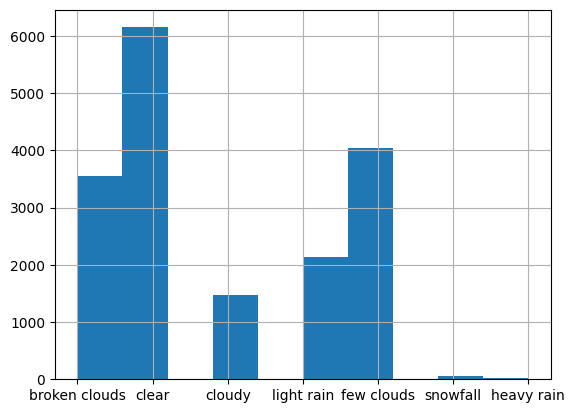

In [17]:
bike_rent.weather.hist()

Гистограммы один из главных помошников при анализе данных. Все основные библиотеки работы с графиками (`matplotlib` as plt, `pandas`, `seaborn`) имеют множество разных настроек для гистограмм.   

Давайте посмотрим, как изменится гистограмма, если мы захотим понять, есть ли зависимость погоды от выходного/рабочего дня

<Axes: xlabel='weather', ylabel='Count'>

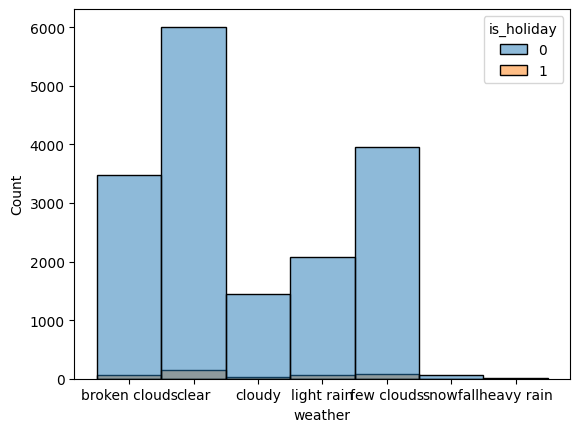

In [18]:
sns.histplot(x='weather', hue='is_holiday', data=bike_rent)

Празднечных дней очень мало. Поэтому и столбики погоды оказываются низкими - анализировать такой график сложно. Применим один очень важный метод - изменения масштаба шкалы.

**Логарифмический масштаб** - шкала, при которой цена деления пропорциональна логарифму отношения на концах этого отрезка.  
Чтобы проще это понять, давайте сравним шкалы логарифмической и обычной (линейной) шкалы:

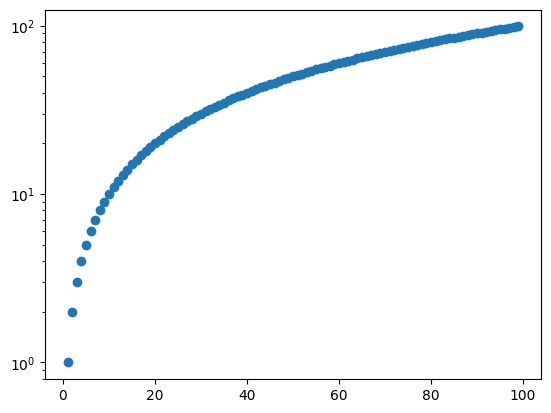

In [19]:
normal_scale = list(range(1, 100))
plt.scatter(x=normal_scale, y=normal_scale)
plt.yscale('log')
plt.show()

На графике мы видим, как значения из линейной шкалы (в данном случае по х) преобразуются в логарифмический (по у). Обратите внимание на кучность точек в начале и ближе к концу.   
Отдельно приглядитесь какие метки у логшкалы - там степени основания! то есть на равном расстоянии находятся не 0, 1, 2, а 10^0, 10^1, 10^2 и т.д.


Логарифмическая шкала позволяет отобразить данные с большим разбросом. Например, чтобы вынести размеры от микроба (`~3*10^(-6)м`) к небоскрёбу (`~3*10^2`) удобно использовать логарифмический масштаб - разница всего 8 порядков, то есть восемь логарифмических отсечек, а не 10млн. в линейной шкале.  

Поэтому и нам удобно будет использовать логарифмическую шкалу:

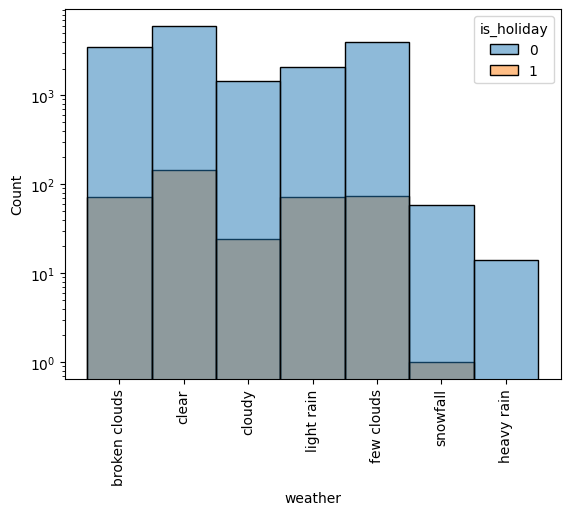

In [20]:
sns.histplot(x='weather', hue='is_holiday', data=bike_rent)
#--------------------
plt.yscale('log')
#--------------------
plt.xticks(rotation=90)
plt.show()

Теперь видно - что погода в дни аренды велосипедов почти никак не зависит от праздничного или рабочего дня. В целом, это достаточно очевидный факт =)  

У подобных графиков очень много вариаций. Например, можно с помощью библиотеки `joypy` (`pip install joypy`) можно посмтроить гистограммы с группировоквой. Например, количество арендованных велосипедов можно сравнить от года к году:

(<Figure size 640x480 with 4 Axes>, [<Axes: >, <Axes: >, <Axes: >, <Axes: >])

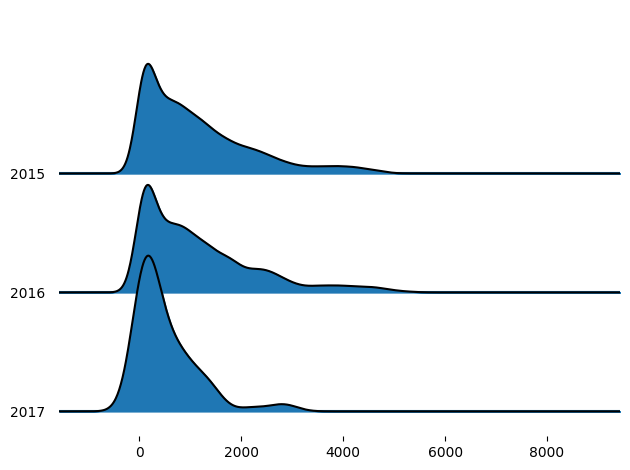

In [21]:
import joypy
joypy.joyplot(bike_rent, by='year', column='cnt')

**Диаграмма рассеяния/Точечный график** (scatter plot) - это математическая диаграмма, изображающая значения двух переменных в виде точек на декартовой плоскости. В таких координатах мы привыкли видеть графики функций.   

Давайте посмотрим, как будет выглядить такая диаграмма для соотношения влажности и температуры `hum` vs `t1`

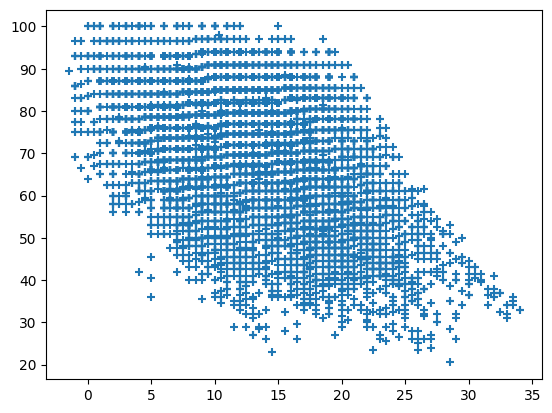

In [22]:
plt.scatter(x='t1', y='hum', marker="+", data=bike_rent)
plt.show()

На этом графике наблюдается небольшая обратная зависимость между температурой и влажностью, как правило, чем выше температура, тем ниже влажность и наоборот. Однако, зависимость очень слабая.  

Заметим также, что смысла соединять точки между собой в данном случае нет. 

**Линейный график/линейная диаграмма** - это представление данных, как правило в декартовой системе координат, которые соеденены отрезками прямых линий.  
Этот тип похож на диаграмму рассеяния, но здесь оказывается важным порядок точек.   

Например, давайте посмотрим, как изменяется количество арендованных велосипедов во времени:

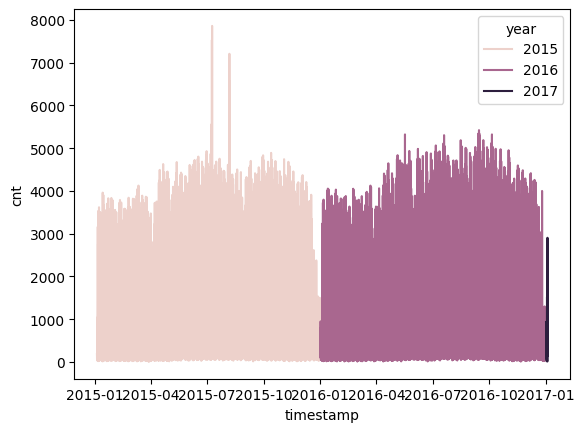

In [23]:
sns.lineplot(bike_rent, x='timestamp', y='cnt', hue='year')
plt.show()

Кажется, график перенасыщен данными... Но какие-то выводы уже можно сделать, например, что для анализа 2017 год не подходит, слишком мало данных. А также, что есть явные "вылеты" (статестически сильно отличающиеся значения - мы их уже на гистограмме вылавливали) в 2015 году, при анализе стоит их отбросить. Если важно попытаться выяснить, чем эти даты особенны.  

В общем, график нужно разгружать - самый удобный способ сгруппировать данные по дню. То есть пересчитать, сколько аренд происходит в день, а не в час.

In [24]:
grouped_by_date = bike_rent[['timestamp', 'is_holiday', 'cnt', 
                             't1', 't2', 'hum', 'wind_speed', 'year']].groupby(pd.Grouper(key='timestamp', 
                                                                                  freq='D')).agg({'is_holiday':'sum',
                                                                                                  'cnt':'sum', 
                                                                                                  't1':'mean', 
                                                                                                  't2':'mean',
                                                                                                  'hum':'mean', 
                                                                                                  'wind_speed':'mean',
                                                                                                  'year':'mean'}).reset_index()
grouped_by_date['is_holiday'] = grouped_by_date['is_holiday']/24
grouped_by_date.sort_values(by='timestamp', inplace=True)
display(grouped_by_date.sample(5))

,timestamp,is_holiday,cnt,t1,t2,hum,wind_speed,year
557,2016-07-14,0.0,39923,17.208333,17.208333,59.104167,13.458333,2016.0
690,2016-11-24,0.0,27941,10.083333,8.541667,77.270833,22.104167,2016.0
407,2016-02-15,0.0,21789,3.666667,0.062500,75.458333,16.312500,2016.0
307,2015-11-07,0.0,14881,15.770833,15.770833,83.645833,22.895833,2015.0
356,2015-12-26,0.0,10230,14.729167,14.729167,74.083333,27.416667,2015.0


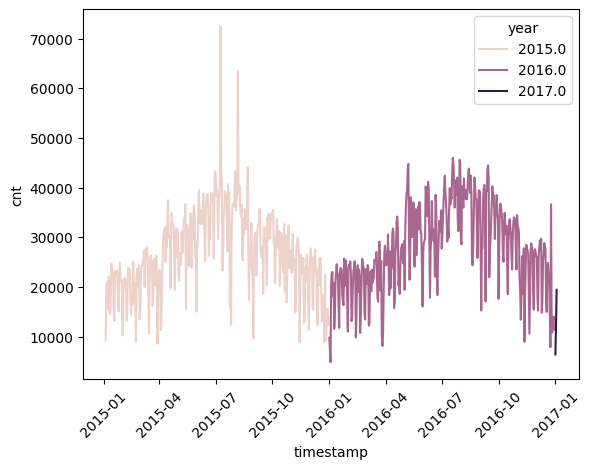

In [25]:
sns.lineplot(grouped_by_date, x='timestamp', y='cnt', hue='year')
plt.xticks(rotation=45)
plt.show()

Можно добавить ещё несколько значений. Например, можем вывести на этот же график дни, когда были выходные:

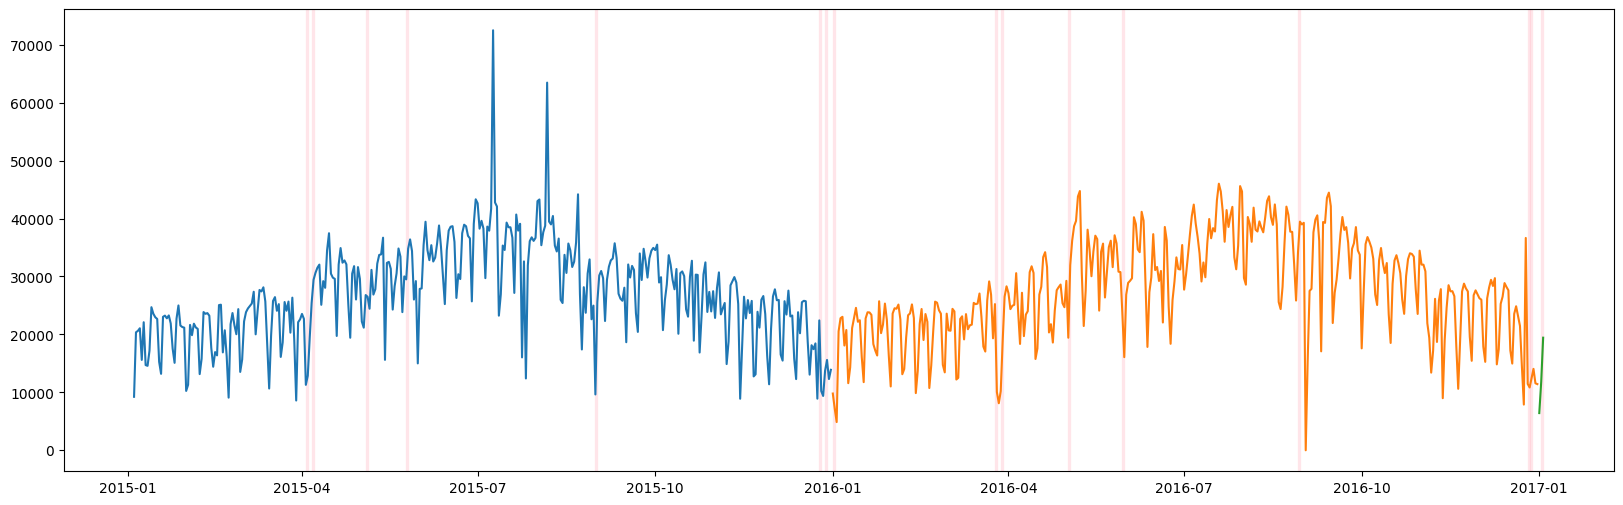

In [26]:
holiday = grouped_by_date.query('is_holiday>0')['timestamp'].to_list()
fig, ax = plt.subplots(figsize=(20,6))
for y in grouped_by_date['timestamp'].dt.year.unique():
    ax.plot(grouped_by_date[grouped_by_date['timestamp'].dt.year==y]['timestamp'], grouped_by_date[grouped_by_date['timestamp'].dt.year==y]['cnt'], label='Количество аренд в сутки')
for i in range(len(holiday)):
    ax.axvspan(holiday[i], holiday[i]+datetime.timedelta(days=1), alpha=0.3, color='pink')
plt.show()


А вот это кажется уже слишком - но разобраться можно:

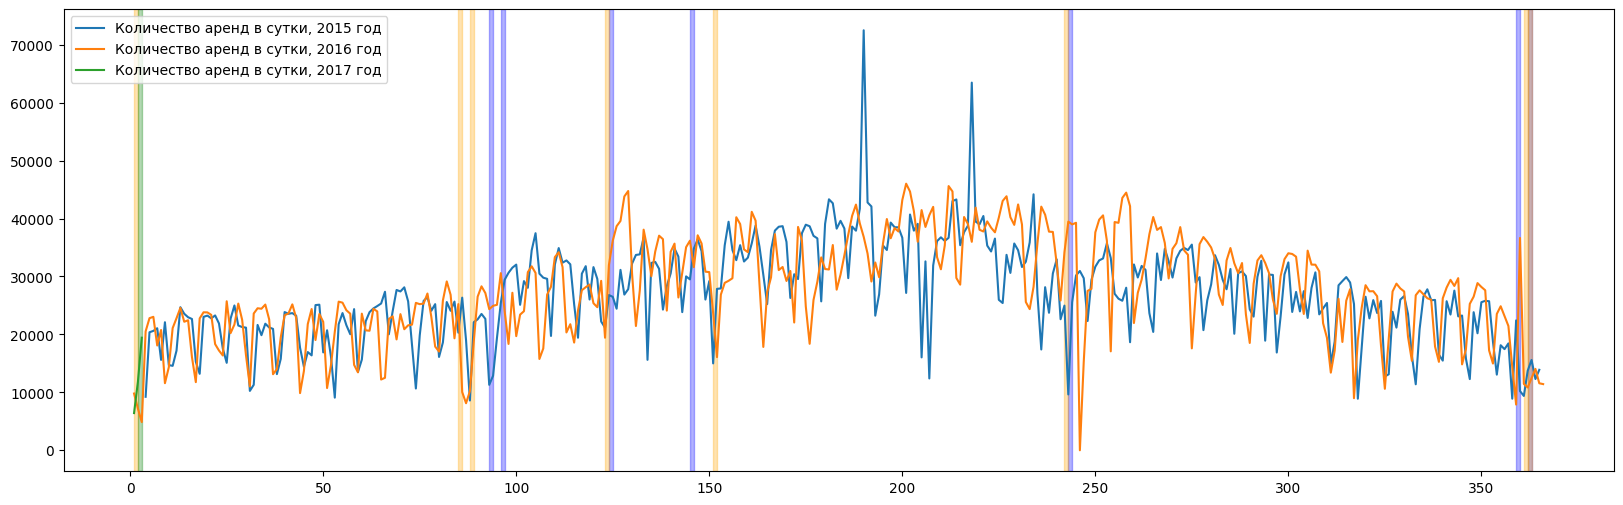

In [27]:
holiday = grouped_by_date.query('is_holiday>0')['timestamp']
fig, ax = plt.subplots(figsize=(20,6))
for y in grouped_by_date['timestamp'].dt.year.unique():
    x = grouped_by_date[grouped_by_date['timestamp'].dt.year==y]['timestamp'].dt.dayofyear
    f = grouped_by_date[grouped_by_date['timestamp'].dt.year==y]['cnt']
    ax.plot(x, f, label=('Количество аренд в сутки, ' + str(y) + ' год'))
plt.legend()
for i in holiday:
    clr = {2015:'blue', 2016:'orange', 2017:'green'}
    color = clr[i.year]
    ax.axvspan(i.dayofyear, i.dayofyear+1, alpha=0.3, color=color)
plt.show()


**Ящик с усами** Помните, мы считали квартили? Ящик с усами - это диаграмма отображающие важнейшие показатели описательной статистики: минимум, границу вылетов снизу, границу первого квартиля, медиану (второй квартиль), границу третьего квартиля, границу вылетов сверху, максимум.  
Потребуется несколько понятий:  
* межквартильный размах (Q3-Q1 или IQR)  
* граница вылетов снизу (ус) Q1-1,5IQR
* граница вылетов сверху (ус) Q3+1,5IQR


C:\Users\Maria Smirnova\AppData\Local\Temp\ipykernel_18244\3259320226.py:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([bike_rent.cnt, bike_rent.query('is_holiday==0').cnt, bike_rent.query('is_holiday!=0').cnt], labels=['Все данные', 'Не праздники', 'Праздники'])


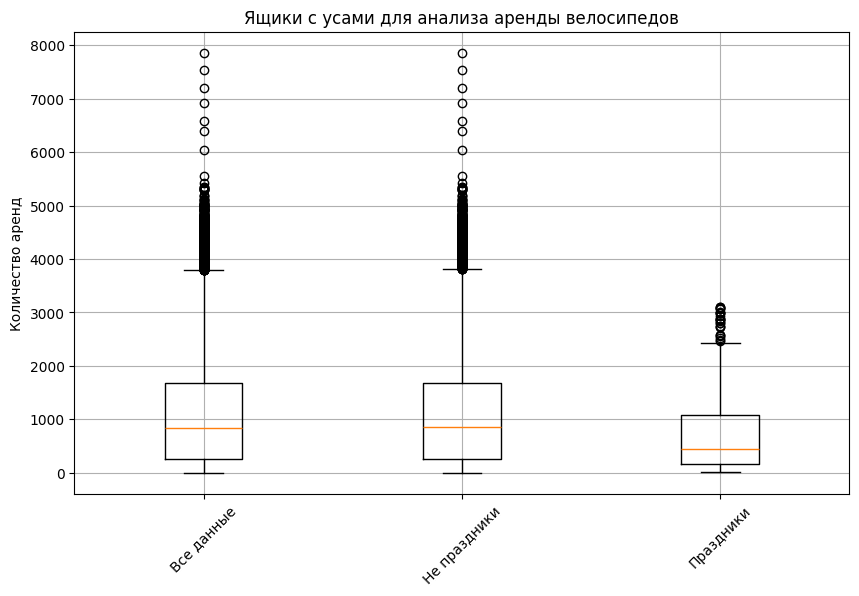

In [28]:
plt.figure(figsize=(10, 6))
plt.boxplot([bike_rent.cnt, bike_rent.query('is_holiday==0').cnt, bike_rent.query('is_holiday!=0').cnt], labels=['Все данные', 'Не праздники', 'Праздники'])

# Настройки графика
plt.title('Ящики с усами для анализа аренды велосипедов')
plt.ylabel('Количество аренд')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

Проанализировав графики мы можем заметить:
* вылетов снизу нет - минимальное значение (0) лежит в пределах `1.5IQR`  
* вылеты сверух есть - для всех данных граница проходит примерно на 4 тыс. По хорошему остальные данные можно отрезать.   
* в праздничные существенно меньше араенда: меньше и Q1 и медиана, даже пиковые значения меньше.   
* а вот не праздничные очень похожи на все дни - вероятно, праздничных дней так мало, что они практически не влияют на основные характеристики распределения.

**Скрипичная диаграмма** - это вариация ящика с усами и диаграммы рассеяния одновременно. Она позволяет визуализировать распределение данных с одной переменной для демонстрации сравнений между несколькими категориями.   

Например, давайте попробуем понять в какую погоду какое распределение аренды велосипедов, добавим к этому разбиение на праздничные/рабочие дни:

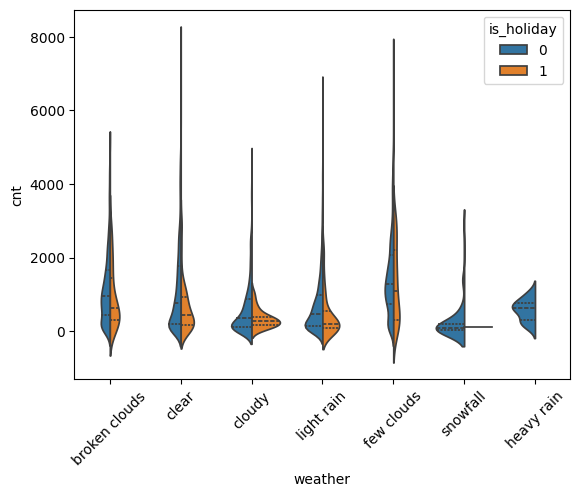

In [29]:
sns.violinplot(data=bike_rent, x='weather', y='cnt', hue='is_holiday', split=True, inner='quart')
plt.xticks(rotation=45)
plt.show()

Чтож, вероятно, по своей воле никто в сильный дождь и снегопад на велосипеде не ездит. А на работу - похоже можно =)  

На этой диаграмме мы совемещаем как бы гистограмму (для каждой отдельной погоды) и сравнение этих гистограмм для праздничных/рабочих дней.

**Тепловая карта** (heatmap) - это графическое представление данных, где индивидуальные значения в таблице отображаются при помощи цвета. Очень полезный график, когда нужно сравнить распределение категориальных показателей. И ещё более полезно для **распределения** корреляций

В наборе данных `bike_rent`- пока только один категориальный признак `weather`. Поэтому давайте введём второй - по скорости ветра.   
Попробуем применить шкалу Бофорта, но немного изменим названия:  
0 м/с - штиль  
до 2 м/с - очень слабый  
2-5 м/с - слабый  
5-7 м/с - слабо умеренный  
8-10 м/с - умеренный  
10-18 м/с - сильный



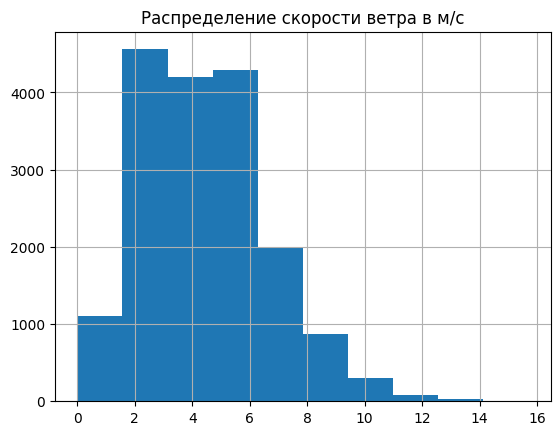

In [30]:
(bike_rent.wind_speed*1000/3600).hist()
plt.title('Распределение скорости ветра в м/с')
plt.show()

In [38]:
# Диапазоны и соответствующие категории
ranges = [(0, 0), (0, 2), (2, 5), (5, 7), (7, 10), (10, 18)]
categories = ['Штиль', 'Очень слабый', 'Слабый', 'Слабо умеренный', 'Умеренный', 'Сильный']

# Функция для присвоения категорий
def assign_category(value):
    for range, category in zip(ranges, categories):
        if range[0] < value <= range[1]:
            return category
    return None

# Применение функции ко всем значениям в столбце
bike_rent['wind_speed_ms'] = bike_rent.wind_speed*1000/3600
bike_rent['wind_category'] = bike_rent['wind_speed_ms'].apply(assign_category)

# Проверка результата
display(bike_rent.sample(5))

,timestamp,cnt,t1,t2,hum,wind_speed,is_holiday,weather,year,month,day,weight,wind_speed_ms,wind_category
10652,2016-03-25 01:00:00,111,9.0,6.5,94.0,16.0,1,light rain,2016,3,25,1,4.444444,Слабый
17156,2016-12-24 06:00:00,53,7.0,3.5,81.0,22.0,0,clear,2016,12,24,1,6.111111,Слабо умеренный
9206,2016-01-24 11:00:00,1058,14.0,14.0,82.0,17.0,0,cloudy,2016,1,24,1,4.722222,Слабый
3780,2015-06-10 23:00:00,484,12.5,12.5,67.0,16.0,0,clear,2015,6,10,1,4.444444,Слабый
990,2015-02-14 08:00:00,366,7.0,5.5,93.0,10.0,0,few clouds,2015,2,14,1,2.777778,Слабый


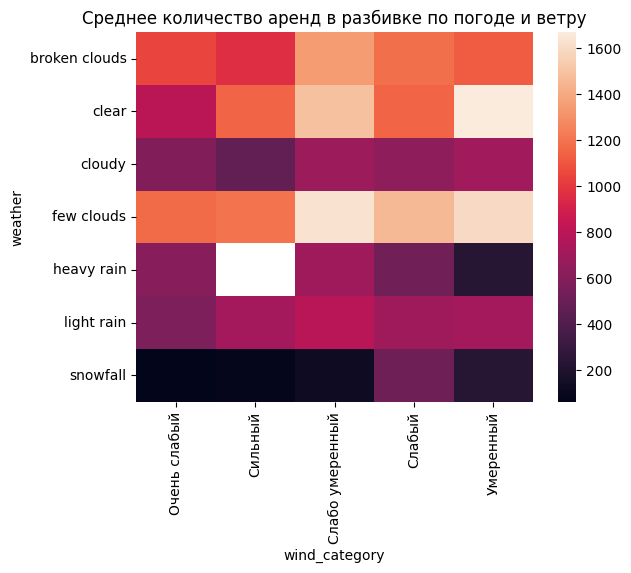

In [58]:
pivot_df = bike_rent.groupby(by=['weather', 'wind_category']).mean().reset_index()
pivot_df = pivot_df.pivot(index='weather', columns='wind_category', values='cnt')
sns.heatmap(pivot_df) #, annot=True, fmt='.0'
plt.title('Среднее количество аренд в разбивке по погоде и ветру')
plt.show()

Забавно, что значение 0 (haevy rain & Сильный ветер) окрасилось в белый цвет - это может немного сбивать с толку при такой цветовой гамме. И конечно, лучше бы выставить другой порядок на шкале ветра.  

Эта диаграмма помогате нам визуализировать при каких погодных условиях как арендуют велосипеды. В целом, для нас уже ничгео нового - сильный ветер и плохая погода не популярное время для аренды велосипеда.

**Q-Q plot** (квантиль-квантиль график) -  сторого говоря, это график иллюстрирующий насколько наблюдаемое распределение отличается от нормального. В этой тетрадке ещё типа распределений не обсуждались, однако на график стоит посмотреть. Как следует из названия график строится по квантилям - 1 наблюдение = 1 квантиль. Подробно можно почитать [здесь](https://habr.com/ru/articles/578754/).   

Давайте, посмотрим, насколько "нормальным" является распределение измеренной и "ощущаемой" температур. 

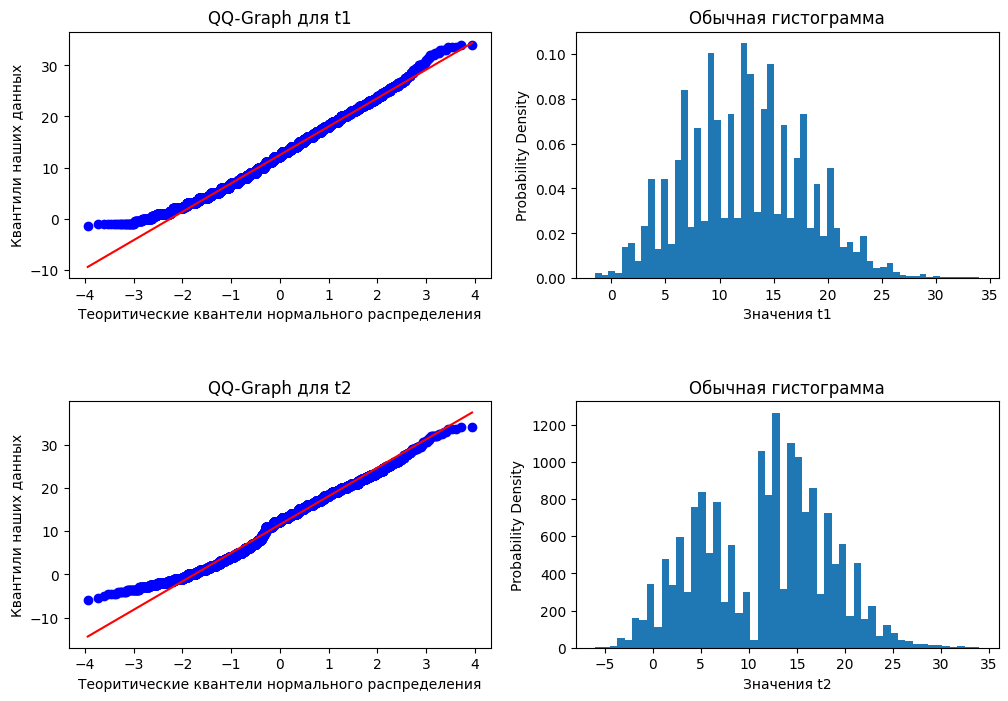

In [71]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.5)
stats.probplot(bike_rent.t1, dist='norm', plot=axs[0][0])
axs[0][0].set_title('QQ-Graph для t1')
axs[0][0].set_xlabel('Теоритические квантели нормального распределения')
axs[0][0].set_ylabel('Квантили наших данных')

# Построение гистограммы
counts, bins, _ = axs[0][1].hist(bike_rent.t1,bins='auto',  density=True)
axs[0][1].set_title('Обычная гистограмма')
axs[0][1].set_xlabel('Значения t1')
axs[0][1].set_ylabel('Probability Density')

stats.probplot(bike_rent.t2, dist='norm', plot=axs[1][0])
axs[1][0].set_title('QQ-Graph для t2')
axs[1][0].set_xlabel('Теоритические квантели нормального распределения')
axs[1][0].set_ylabel('Квантили наших данных')

# Построение гистограммы
counts, bins, _ = axs[1][1].hist(bike_rent.t2, bins='auto')
axs[1][1].set_title('Обычная гистограмма')
axs[1][1].set_xlabel('Значения t2')
axs[1][1].set_ylabel('Probability Density')

plt.show()

Оба расспределния не нормальные, но погода достаточно близка к нему. А вот "как ощущается" имеет забавный поворот - вероятно функция предсказывающая этот показатель нелинейна, что подтверждается гистограммой.